<a href="https://colab.research.google.com/github/halonoer/Learn_Collab_Google/blob/main/Modul2(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Eps2-Data-train.csv to Eps2-Data-train.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Eps2-Data-train.csv']))
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
data = pd.read_csv('Eps2-Data-train.csv')
print (data.shape)

(891, 12)


In [ ]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
print (data['Age'].dtypes)

float64


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,count
Survived,
0,549
1,342


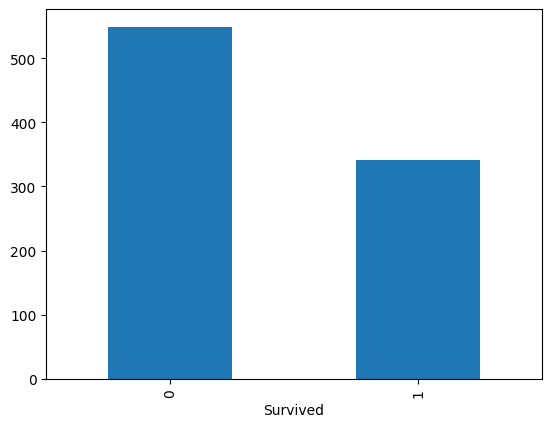

In [ ]:
data['Survived'].value_counts().plot(kind='bar')
data['Survived'].value_counts()

In [ ]:
def survival_stacked_bar(variable):
    died = data[data['Survived'] == 0][variable].value_counts() / len(data[data['Survived'] == 0])
    survived = data[data["Survived"] == 1][variable].value_counts() / len(data[data['Survived'] == 1])

    dataset = pd.DataFrame([died, survived])
    dataset.index = ['Meninggal', 'Selamat']
    dataset.plot(kind="bar", stacked=True, title='Prosentase')

    return dataset.head()

Sex,male,female
Meninggal,0.852459,0.147541
Selamat,0.318713,0.681287


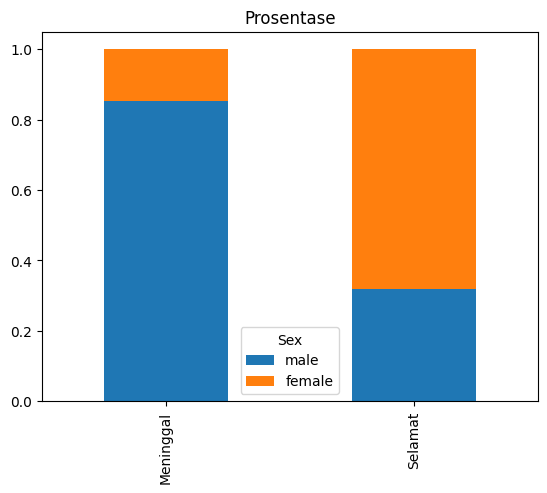

In [ ]:
survival_stacked_bar('Sex')

Pclass,3,2,1
Meninggal,0.677596,0.176685,0.145719
Selamat,0.347953,0.254386,0.397661


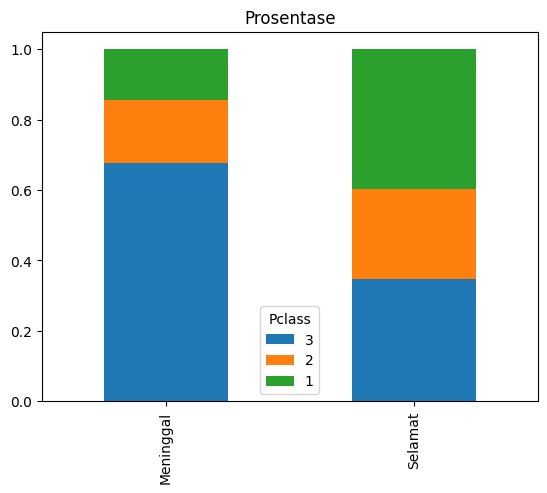

In [ ]:
survival_stacked_bar('Pclass')

Embarked,S,C,Q
Meninggal,0.777778,0.136612,0.085610
Selamat,0.634503,0.271930,0.087719


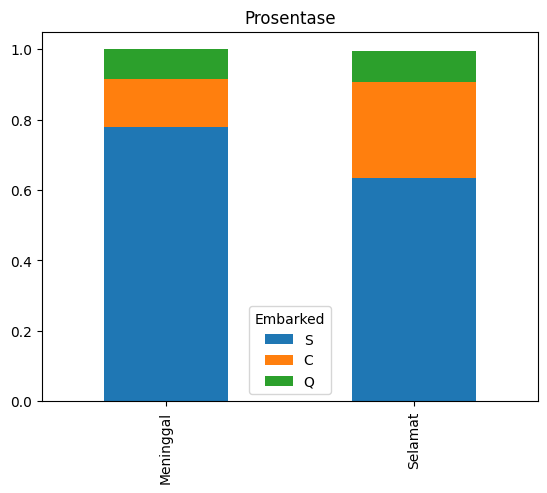

In [ ]:
survival_stacked_bar('Embarked')

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:

data = data.drop(columns=['Cabin'])
print(data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [ ]:
data = data.dropna(subset=['Embarked'])
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [ ]:
data = data.dropna(subset=['Embarked'])

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:

# Cek jumlah missing value setelah penanganan
print(data.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


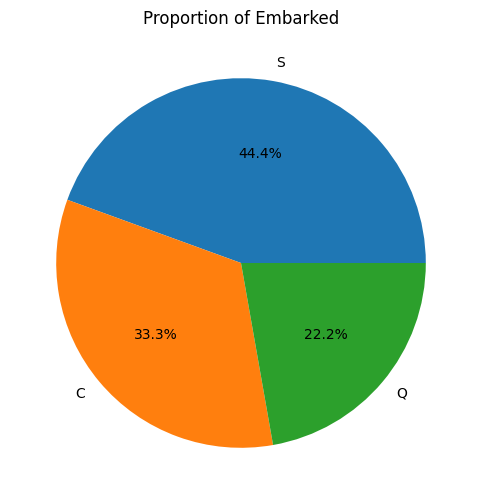

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh data
data = pd.DataFrame({
    'Embarked': ['S', 'C', 'S', 'Q', 'C', 'S', 'Q', 'S', 'C']
})

# Menghitung frekuensi berdasarkan 'Embarked'
embarked_counts = data['Embarked'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Proportion of Embarked')
plt.show()


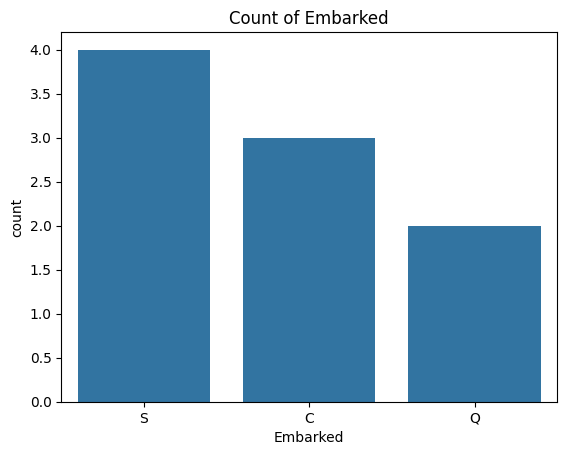

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menggunakan seaborn untuk membuat count plot (bar chart)
sns.countplot(x='Embarked', data=data)
plt.title('Count of Embarked')
plt.show()


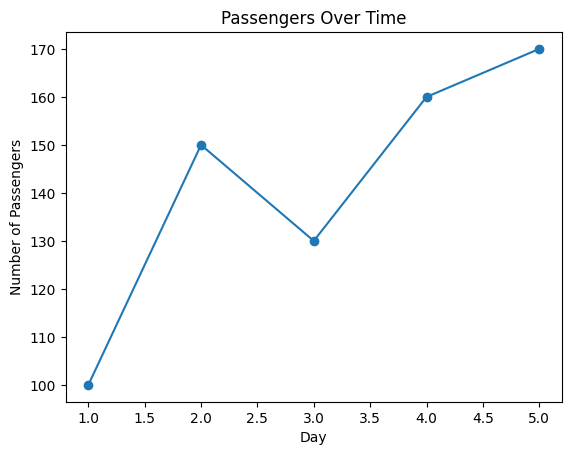

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh data
data = pd.DataFrame({
    'Day': [1, 2, 3, 4, 5],
    'Passengers': [100, 150, 130, 160, 170]
})

# Membuat line chart
plt.plot(data['Day'], data['Passengers'], marker='o')
plt.title('Passengers Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Passengers')
plt.show()


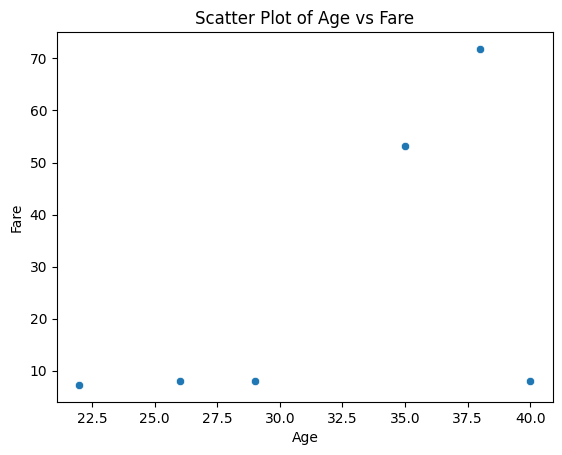

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh data
data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 40, 29],
    'Fare': [7.25, 71.83, 7.92, 53.1, 8.05, 8.05]
})

# Membuat scatter plot
sns.scatterplot(x='Age', y='Fare', data=data)
plt.title('Scatter Plot of Age vs Fare')
plt.show()


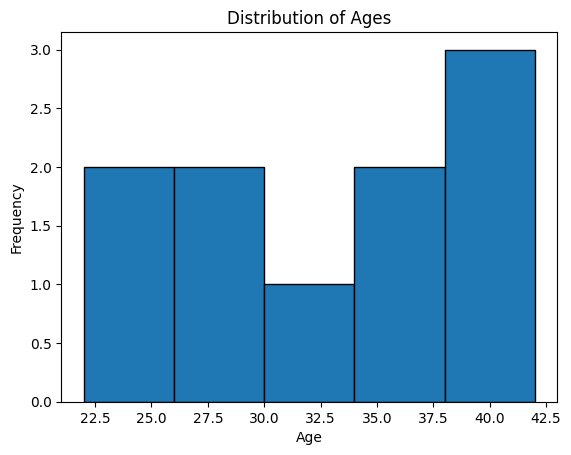

In [ ]:
import matplotlib.pyplot as plt

# Contoh data
ages = [22, 38, 26, 35, 40, 29, 24, 30, 35, 42]

# Membuat histogram
plt.hist(ages, bins=5, edgecolor='black')
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


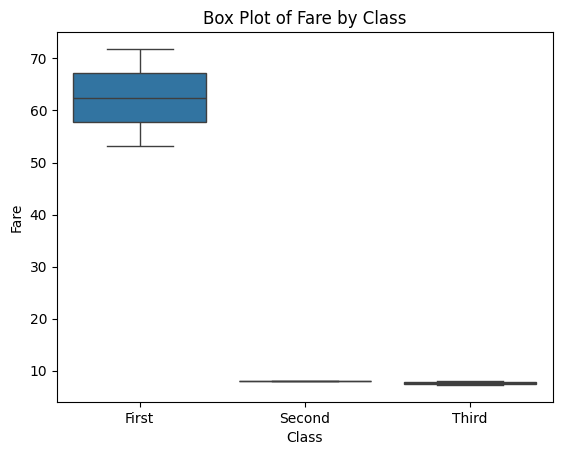

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh data
data = pd.DataFrame({
    'Class': ['First', 'Second', 'Third', 'First', 'Third'],
    'Fare': [71.83, 8.05, 7.25, 53.1, 7.92]
})

# Membuat box plot
sns.boxplot(x='Class', y='Fare', data=data)
plt.title('Box Plot of Fare by Class')
plt.show()


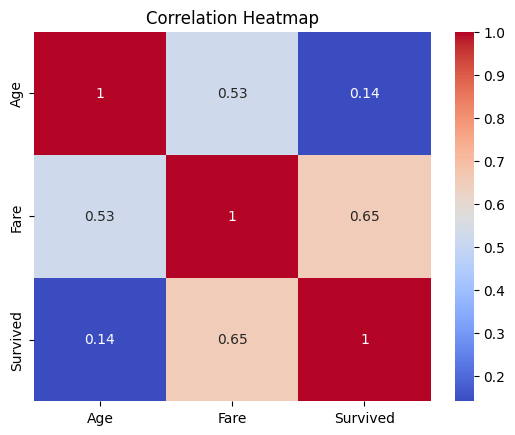

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh data korelasi
data = pd.DataFrame({
    'Age': [22, 38, 26, 35, 40],
    'Fare': [7.25, 71.83, 7.92, 53.1, 8.05],
    'Survived': [0, 1, 1, 1, 0]
})

# Menghitung korelasi
corr = data.corr()

# Membuat heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
print(data.isnull().sum())
print(data.shape)

Age         0
Fare        0
Survived    0
dtype: int64
(5, 3)
